### First Home Assignment
#### Prospecção de Dados 2021/2022
#### Group nº 9
#### Filipe Paulino, 57443
#### Francisco Carvalho, 40171
#### Luís Santos, 57470


### 0.1 Libraries import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, matthews_corrcoef, confusion_matrix, classification_report
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import StratifiedKFold
from IPython.display import HTML

### 0.2 Load data

In [2]:
df = pd.read_csv("PD_21_22_HA1_dataset.csv",sep="\t")

### 0.2 Data overview

#### General overview

In [3]:
df.head()

Popularity  danceability  energy  key  loudness  mode  speechiness  \
0          40         0.565   0.292    8   -13.124     1       0.0255   
1           1         0.558   0.439    1    -9.676     1       0.0274   
2          21         0.472   0.534    2   -10.742     0       0.0342   
3          35         0.594   0.619    1   -11.123     0       0.0478   
4          21         0.732   0.550    2    -8.711     0       0.0397   

   acousticness  instrumentalness  liveness  valence    tempo  \
0         0.889          0.001260    0.1120   0.2170   78.535   
1         0.248          0.001650    0.1020   0.0381  103.958   
2         0.760          0.086100    0.0893   0.3830  184.014   
3         0.597          0.000144    0.0694   0.3850   89.691   
4         0.809          0.091000    0.0914   0.2350  132.974   

   duration_in min/ms  time_signature  Class  
0            3.503633               1      0  
1            4.947117               1      0  
2            4.972833               1      0  
3            5.835783               1      0  
4            6.133783               1      0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11813 entries, 0 to 11812
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          11813 non-null  int64  
 1   danceability        11813 non-null  float64
 2   energy              11813 non-null  float64
 3   key                 11813 non-null  int64  
 4   loudness            11813 non-null  float64
 5   mode                11813 non-null  int64  
 6   speechiness         11813 non-null  float64
 7   acousticness        11813 non-null  float64
 8   instrumentalness    11813 non-null  float64
 9   liveness            11813 non-null  float64
 10  valence             11813 non-null  float64
 11  tempo               11813 non-null  float64
 12  duration_in min/ms  11813 non-null  float64
 13  time_signature      11813 non-null  int64  
 14  Class               11813 non-null  int64  
dtypes: float64(10), int64(5)
memory usage: 1.4 MB


In [5]:
df.describe()

Popularity  danceability        energy           key      loudness  \
count  11813.000000  11813.000000  11813.000000  11813.000000  11813.000000   
mean      43.100652      0.524944      0.670305      5.972573     -8.215807   
std       16.568500      0.166013      0.242324      3.167348      4.239682   
min        1.000000      0.064400      0.000020      1.000000    -36.214000   
25%       32.000000      0.413000      0.513000      3.000000     -9.994000   
50%       42.000000      0.527000      0.716000      6.000000     -7.314000   
75%       54.000000      0.638000      0.875000      9.000000     -5.341000   
max       98.000000      0.989000      1.000000     11.000000      1.355000   

               mode   speechiness  acousticness  instrumentalness  \
count  11813.000000  11813.000000  11813.000000      11813.000000   
mean       0.623974      0.071107      0.239968          0.178991   
std        0.484407      0.067783      0.319142          0.303809   
min        0.000000      0.022500      0.000000          0.000001   
25%        0.000000      0.034600      0.001890          0.000096   
50%        1.000000      0.046300      0.056100          0.004290   
75%        1.000000      0.076500      0.421000          0.209000   
max        1.000000      0.935000      0.996000          0.996000   

           liveness       valence         tempo  duration_in min/ms  \
count  11813.000000  11813.000000  11813.000000        1.181300e+04   
mean       0.195096      0.470115    122.928641        2.129446e+05   
std        0.159743      0.244635     29.430883        1.158561e+05   
min        0.011900      0.018300     30.557000        5.016500e-01   
25%        0.096900      0.271000    100.001000        1.755330e+05   
50%        0.127000      0.462000    120.046000        2.178830e+05   
75%        0.256000      0.660000    141.877000        2.635870e+05   
max        0.992000      0.980000    217.416000        1.477187e+06   

       time_signature         Class  
count    11813.000000  11813.000000  
mean         3.913824      6.622619  
std          0.381625      3.246656  
min          1.000000      0.000000  
25%          4.000000      5.000000  
50%          4.000000      8.000000  
75%          4.000000     10.000000  
max          5.000000     10.000000

#### Define data types

In [6]:
meta = []

categorical = ['Popularity','key','mode','time_signature']

numerical = ['danceability', 'energy','loudness','speechiness',
                  'acousticness', 'instrumentalness', 'liveness','valence',
                  'tempo', 'duration_in min/ms']

features = list(categorical) + list(numerical)

targets = ['Class']

#### Check for errors/typos and duplicates

A quick check for errors in categorical types. None found.

In [7]:
for i in categorical:
    print(i, ":\n", pd.unique(df[i]))

Popularity :
 [40  1 21 35 25 46 37 30 52 43 55 34  7 70 45 64 20 44 36 33 59 24 48 32
 67 41 18 17 23 39 19 31 63 50 57 49 16  8  6 42 47 12 68 73 22 38 56 71
 51 27 62 61 29 28 60 53 76  2 54 69 77  9 65 13 66 11 75  5 10 26 14 15
 86 58 72 84 74 82 85 79 78 89  3  4 80 81 98 92 83 90 88 87 95 97 91 94
 93]
key :
 [ 8  1  2  7 10  6  3  5  4  9 11]
mode :
 [1 0]
time_signature :
 [1 3 4 5]


A quick check for duplicates. None found.

In [8]:
print(df.shape)
df.drop_duplicates(subset=None,keep=False)
print(df.shape)

(11813, 15)
(11813, 15)


#### Attributes histograms

array([[<AxesSubplot:title={'center':'Popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>],
       [<AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>],
       [<AxesSubplot:title={'center':'duration_in min/ms'}>,
        <AxesSubplot:title={'center':'time_signature'}>,
        <AxesSubplot:title={'center':'Class'}>, <AxesSubplot:>]],
      dtype=object)

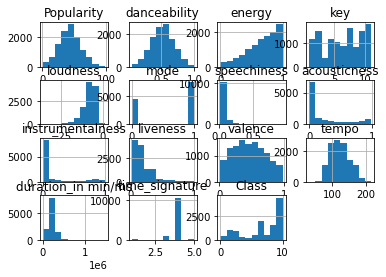

In [9]:
df.hist()

#### Class balance

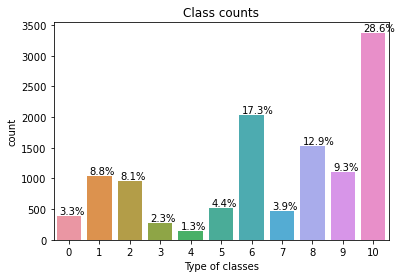

In [10]:
cplot = sns.countplot(data=df, x='Class') #Returns a Axes object
for p in cplot.axes.patches:
    #Get percentages for classes
        percentage = '{:.1f}%'.format(100 * p.get_height()/len(df.values))
        x = p.get_x() + p.get_width()/10
        y = p.get_y() + p.get_height() + 30
        cplot.annotate(percentage, (x, y))

cplot.set_title("Class counts")
cplot.set_xlabel("Type of classes")
cplot
plt.show()

#### Summmary for this section (0.2 Data overview)

No data cleaning is necessary due to the absence of errors/typos or duplicates.

### 1.1 Preparing data and preprocessing

#### Functions defined in this section (0.3 Preparing data and preprocessing)

In [12]:
# CHANGED:
# Added est as an output to be used in the IVS dataset

# To bin the values in selected features
def bin_numerical(data, nums, bins, strat='uniform'):
    
    est = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strat)
    est.fit(data[nums])
    data[nums] = est.transform(data[nums])

    return data, est

In [13]:
# One hot encoding of eatures to binary 0,1 or boolean

def ohencode(to_encode, var, boolean=False):

    # other
    other = [x for x in to_encode.columns.to_list() if x not in var]
    data_other = to_encode[other]

    # encode categorical
    encode_cat = to_encode[var]
    if boolean==True:
        enc = OneHotEncoder(dtype=bool)
    else:
        enc = OneHotEncoder()
    enc = enc.fit(to_encode[var])
    encode_cat = enc.transform(to_encode[var]).toarray()
    encode_cat = pd.DataFrame(encode_cat, columns=enc.get_feature_names(var))

    # concatenate
    encoded = pd.concat([data_other, encode_cat], axis=1) # attributes

    # encoded features
    enc_features = (encoded.columns).difference(categorical).difference(numerical)
    enc_features

    return encoded, enc, enc_features

In [14]:
# Data scaling and normalization

def minmax_ss_scaler(to_scale, nums, minmax=False, sscaler=False):

    # scale numerical
    if minmax==True:
        mm_scaler = MinMaxScaler()
        mm_scaler = mm_scaler.fit(to_scale[nums])
        to_scale[nums] = pd.DataFrame(mm_scaler.transform(to_scale[nums]), columns = nums) # minmax training data
        # to_scale_val[nums] = mm_scaler.transform(to_scale_val[nums]) # scale test data using training data parameters
    else: mm_scaler=[]
    if sscaler==True:
        s_scaler = StandardScaler()
        s_scaler = s_scaler.fit(to_scale[nums])
        to_scale[nums] = pd.DataFrame(s_scaler.transform(to_scale[nums]), columns = nums) # standardize training data
        # to_scale_val[nums] = s_scaler.transform(to_scale_val[nums]) # scale test data using training data parameters
    else: s_scaler=[]
    
    return to_scale, mm_scaler, s_scaler

#### Initial data manipulation

Extract arrays of interest.

In [15]:
Xpd = df.drop(columns=targets).drop(columns=meta)
ypd = df[targets]

Remove data to act as an Independent Validation Set. This set will be used in Retrospective Model Validation during the last stage of our work.

In [16]:
X_train, X_IVS, y_train, y_IVS = train_test_split(Xpd.values, ypd.values, test_size=0.2, stratify=ypd.values, random_state=23, shuffle=True)

Xpd_train = pd.DataFrame(X_train, columns=Xpd.columns)
Xpd_IVS = pd.DataFrame(X_IVS, columns=Xpd.columns)

Duplicate training data for different preprocessing pipelines. One for Categorical Naive Bayes, and other for Gaussian Naive Bayes.

In [17]:
Xpd_train_Categ_NB_ordinal = Xpd_train.copy(deep=True)
Xpd_train_Categ_NB_ohe = Xpd_train.copy(deep=True)
Xpd_train_Gauss_NB = Xpd_train.copy(deep=True)
Xpd_train_Gauss_NB_no_cat = Xpd_train.copy(deep=True)

#### Preprocessing for Categorical Naive Bayes

To correctly train the Categorical Naive Bayes model it is necessary to discretize the numerical variables.

The first step is to decide how to perform the discretization. For that we considered the following rules of thumb: the number of bins should be between 3 and 20 depending on the complexity of the data distribution, if the data is skewed a frequency discretization is to be preferred. Looking at the histograms we merge the atttributes in 3 categories of binning and decide to implement frequency discretization for all attributes since most distributions are higly skewed. As an example, instrumentalness is divided into 3 bins because it's distribution is extremely concentrated, energy is divided into 8 bins because it has a more irregular distribution.

We proceed to discretize and encode the variables.

In [20]:
# CHANGED
# Saved the est_nbins to be used in the IVS dataset

numerical_8bins = ['energy','tempo']
numerical_5bins = ['danceability','loudness','speechiness','acousticness',
                    'liveness','valence','duration_in min/ms']
numerical_3bins = ['instrumentalness'] # many bins didn't make sense or were not possible
popularity = ['Popularity']

Xpd_train_Categ_NB_ordinal, est_8bins_ordinal = bin_numerical(Xpd_train_Categ_NB_ordinal, numerical_8bins, 8)
Xpd_train_Categ_NB_ordinal, est_5bins_ordinal = bin_numerical(Xpd_train_Categ_NB_ordinal, numerical_5bins, 5)
Xpd_train_Categ_NB_ordinal, est_3bins_ordinal = bin_numerical(Xpd_train_Categ_NB_ordinal, numerical_3bins, 3)
Xpd_train_Categ_NB_ordinal, est_popularity_ordinal = bin_numerical(Xpd_train_Categ_NB_ordinal, popularity, 10, 'uniform')

Xpd_train_Categ_NB_ohe, est_8bins_ohe = bin_numerical(Xpd_train_Categ_NB_ohe, numerical_8bins, 8)
Xpd_train_Categ_NB_ohe, est_5bins_ohe = bin_numerical(Xpd_train_Categ_NB_ohe, numerical_5bins, 5)
Xpd_train_Categ_NB_ohe, est_3bins_ohe = bin_numerical(Xpd_train_Categ_NB_ohe, numerical_3bins, 3)
Xpd_train_Categ_NB_ohe, est_popularity_ohe = bin_numerical(Xpd_train_Categ_NB_ohe, popularity, 10, 'uniform')

Xpd_train_Categ_NB_ohe, ohe_fit_cat, ohe_columns_cat_Categ_NB = ohencode(Xpd_train_Categ_NB_ohe, categorical, boolean=True)
Xpd_train_Categ_NB_ohe, ohe_fit_num, ohe_columns_num_Categ_NB = ohencode(Xpd_train_Categ_NB_ohe, numerical, boolean=True)

Of the categorical variables, *Popularity* is the most ambiguous because it is ordinal and uses an integer scale that could almost be mistaken for continuous but in reality there is no meaning in the interval between successive values (is the difference between popularity 1 and 2 the same as between popularity 75 and 76? We believe it is not). Also, for a categorical variable, we believe that it is excessively discretized so we divide it into new categories also increase interpretability. In this case, because it is categorical, we simply divide at uniform intervals in a total of 10 intervals.

#### Preprocessing for Gaussian Naive Bayes

The first step in preparing the data is to deal with the categorical variables. We reduce the number of categories of the *Popularity* variable and then one-hot encode all the categorical variables just like we did before. This is less than ideal because we are violating several assumptions of the model, the first is that each variable is normally distributed, and he second is that the variables are indepedent (one variable that is one-hot encoded creates multiple variables that are extremely correlated to one another). Despite this we choose to use these variables because we didn't want to ignore almost one third of the data right from the start, and also because due to the complex nature of the problems, there always a chance that the model outperforms the others, even if we are violating it's the theoretical assumptions.

Later we also test the Gaussian model with only the numerical features.

In [24]:
Xpd_train_Gauss_NB, est_gauss_popularity = bin_numerical(Xpd_train_Gauss_NB, popularity, 10, 'uniform')
Xpd_train_Gauss_NB, Xpd_train_Gauss_NB_fit, ohe_columns_cat_Gauss_NB = ohencode(Xpd_train_Gauss_NB, categorical, boolean=False)
Xpd_train_Gauss_NB_no_cat = Xpd_train_Gauss_NB_no_cat.drop(columns=categorical, axis=1)

In [25]:
# standardize data
Xpd_train_Gauss_NB, Xpd_train_Gauss_NB_mmscaler_fit, Xpd_train_Gauss_NB_sscaler_fit = minmax_ss_scaler(Xpd_train_Gauss_NB, list(numerical), minmax=False, sscaler=True)
Xpd_train_Gauss_NB_no_cat, Xpd_train_Gauss_no_cat_NB_mmscaler_fit, Xpd_train_Gauss_no_cat_NB_sscaler_fit = minmax_ss_scaler(Xpd_train_Gauss_NB_no_cat, list(numerical), minmax=False, sscaler=True)

In [26]:
Xpd_train_Categ_NB_ordinal

Popularity  danceability  energy   key  loudness  mode  speechiness  \
0            5.0           3.0     3.0   8.0       3.0   1.0          1.0   
1            3.0           2.0     7.0  11.0       4.0   0.0          0.0   
2            2.0           3.0     5.0   8.0       3.0   1.0          0.0   
3            3.0           2.0     7.0   3.0       3.0   0.0          0.0   
4            6.0           2.0     7.0   6.0       4.0   1.0          0.0   
...          ...           ...     ...   ...       ...   ...          ...   
9445         4.0           2.0     5.0   8.0       2.0   1.0          0.0   
9446         2.0           2.0     3.0   7.0       2.0   0.0          0.0   
9447         4.0           3.0     6.0   6.0       4.0   0.0          0.0   
9448         3.0           2.0     5.0   4.0       3.0   0.0          0.0   
9449         5.0           1.0     5.0   6.0       3.0   0.0          0.0   

      acousticness  instrumentalness  liveness  valence  tempo  \
0              0.0               0.0       0.0      1.0    5.0   
1              0.0               0.0       0.0      4.0    4.0   
2              0.0               1.0       0.0      3.0    2.0   
3              0.0               0.0       1.0      2.0    2.0   
4              0.0               0.0       0.0      2.0    2.0   
...            ...               ...       ...      ...    ...   
9445           2.0               0.0       1.0      4.0    4.0   
9446           2.0               0.0       1.0      1.0    3.0   
9447           3.0               0.0       1.0      2.0    2.0   
9448           0.0               1.0       0.0      2.0    4.0   
9449           0.0               0.0       1.0      2.0    2.0   

      duration_in min/ms  time_signature  
0                    1.0             5.0  
1                    0.0             4.0  
2                    0.0             4.0  
3                    0.0             4.0  
4                    0.0             4.0  
...                  ...             ...  
9445                 0.0             4.0  
9446                 0.0             4.0  
9447                 0.0             4.0  
9448                 0.0             4.0  
9449                 0.0             4.0  

[9450 rows x 14 columns]

In [27]:
Xpd_train_Categ_NB_ohe

Popularity_0.0  Popularity_1.0  Popularity_2.0  Popularity_3.0  \
0              False           False           False           False   
1              False           False           False            True   
2              False           False            True           False   
3              False           False           False            True   
4              False           False           False           False   
...              ...             ...             ...             ...   
9445           False           False           False           False   
9446           False           False            True           False   
9447           False           False           False           False   
9448           False           False           False            True   
9449           False           False           False           False   

      Popularity_4.0  Popularity_5.0  Popularity_6.0  Popularity_7.0  \
0              False            True           False           False   
1              False           False           False           False   
2              False           False           False           False   
3              False           False           False           False   
4              False           False            True           False   
...              ...             ...             ...             ...   
9445            True           False           False           False   
9446           False           False           False           False   
9447            True           False           False           False   
9448           False           False           False           False   
9449           False            True           False           False   

      Popularity_8.0  Popularity_9.0  ...  tempo_3.0  tempo_4.0  tempo_5.0  \
0              False           False  ...      False      False       True   
1              False           False  ...      False       True      False   
2              False           False  ...      False      False      False   
3              False           False  ...      False      False      False   
4              False           False  ...      False      False      False   
...              ...             ...  ...        ...        ...        ...   
9445           False           False  ...      False       True      False   
9446           False           False  ...       True      False      False   
9447           False           False  ...      False      False      False   
9448           False           False  ...      False       True      False   
9449           False           False  ...      False      False      False   

      tempo_6.0  tempo_7.0  duration_in min/ms_0.0  duration_in min/ms_1.0  \
0         False      False                   False                    True   
1         False      False                    True                   False   
2         False      False                    True                   False   
3         False      False                    True                   False   
4         False      False                    True                   False   
...         ...        ...                     ...                     ...   
9445      False      False                    True                   False   
9446      False      False                    True                   False   
9447      False      False                    True                   False   
9448      False      False                    True                   False   
9449      False      False                    True                   False   

      duration_in min/ms_2.0  duration_in min/ms_3.0  duration_in min/ms_4.0  
0                      False                   False                   False  
1                      False                   False                   False  
2                      False                   False                   False  
3                      False                   False                   False  
4      

In [28]:
Xpd_train_Gauss_NB

danceability    energy  loudness  speechiness  acousticness  \
0         1.510811 -0.789074 -1.113639     3.929398     -0.319085   
1         0.037602  0.962036  0.681585    -0.393633     -0.750581   
2         0.876848  0.187427  0.028411    -0.083284     -0.749911   
3        -0.240134  1.233973  0.284432    -0.151765     -0.750893   
4         0.194584  0.887871  0.676384    -0.599075     -0.632937   
...            ...       ...       ...          ...           ...   
9445     -0.336738 -0.096870 -1.346493    -0.580134      1.110933   
9446     -0.234096 -0.953884 -1.368951    -0.389262      1.032704   
9447      0.943263  0.566491  0.848956     0.578211      1.326843   
9448      0.333452  0.014377  0.368118    -0.562649     -0.746838   
9449     -0.904285 -0.039187  0.261029    -0.511653     -0.750834   

      instrumentalness  liveness   valence     tempo  duration_in min/ms  ...  \
0            -0.548501 -0.561727 -0.291500  0.938118            1.304074  ...   
1            -0.559175 -0.726177  1.546957  0.842838           -0.068340  ...   
2             0.987923 -0.549268  1.259698 -1.085563            0.514348  ...   
3            -0.043189  0.528380  0.418440 -0.716477            0.355228  ...   
4            -0.231566 -0.200434  0.307640 -0.886534           -1.827909  ...   
...                ...       ...       ...       ...                 ...  ...   
9445         -0.588484  0.895902  1.936809  0.843926           -0.430435  ...   
9446         -0.568396  0.671651 -0.644418 -0.473548           -0.404375  ...   
9447         -0.584854  1.182444  0.315848 -1.293875           -0.643603  ...   
9448          1.268835 -0.331247  0.081937  0.133162           -0.115710  ...   
9449         -0.543874  0.216921  0.172218 -1.069411           -0.029447  ...   

      key_8.0  key_9.0  key_10.0  key_11.0  mode_0.0  mode_1.0  \
0         1.0      0.0       0.0       0.0       0.0       1.0   
1         0.0      0.0       0.0       1.0       1.0       0.0   
2         1.0      0.0       0.0       0.0       0.0       1.0   
3         0.0      0.0       0.0       0.0       1.0       0.0   
4         0.0      0.0       0.0       0.0       0.0       1.0   
...       ...      ...       ...       ...       ...       ...   
9445      1.0      0.0       0.0       0.0       0.0       1.0   
9446      0.0      0.0       0.0       0.0       1.0       0.0   
9447      0.0      0.0       0.0       0.0       1.0       0.0   
9448      0.0      0.0       0.0       0.0       1.0       0.0   
9449      0.0      0.0       0.0       0.0       1.0       0.0   

      time_signature_1.0  time_signature_3.0  time_signature_4.0  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 1.0   
2                    0.0                 0.0                 1.0   
3                    0.0                 0.0                 1.0   
4                    0.0                 0.0                 1.0   
...                  ...                 ...                 ...   
9445                 0.0                 0.0                 1.0   
9446                 0.0                 0.0                 1.0   
9447                 0.0                 0.0                 1.0   
9448                 0.0                 0.0                 1.0   
9449                 0.0                 0.0                 1.0   

      time_signature_5.0  
0                    1.0  
1                    0.0  
2                    0.0  
3                    0.0  
4                    0.0  
...                  ...  
9445                 0.0  
9446                 0.0  
9447                 0.0  
9448                 0.0  
9449                 0.0  

[9450 rows x 37 columns]

In [29]:
Xpd_train_Gauss_NB_no_cat

danceability    energy  loudness  speechiness  acousticness  \
0         1.510811 -0.789074 -1.113639     3.929398     -0.319085   
1         0.037602  0.962036  0.681585    -0.393633     -0.750581   
2         0.876848  0.187427  0.028411    -0.083284     -0.749911   
3        -0.240134  1.233973  0.284432    -0.151765     -0.750893   
4         0.194584  0.887871  0.676384    -0.599075     -0.632937   
...            ...       ...       ...          ...           ...   
9445     -0.336738 -0.096870 -1.346493    -0.580134      1.110933   
9446     -0.234096 -0.953884 -1.368951    -0.389262      1.032704   
9447      0.943263  0.566491  0.848956     0.578211      1.326843   
9448      0.333452  0.014377  0.368118    -0.562649     -0.746838   
9449     -0.904285 -0.039187  0.261029    -0.511653     -0.750834   

      instrumentalness  liveness   valence     tempo  duration_in min/ms  
0            -0.548501 -0.561727 -0.291500  0.938118            1.304074  
1            -0.559175 -0.726177  1.546957  0.842838           -0.068340  
2             0.987923 -0.549268  1.259698 -1.085563            0.514348  
3            -0.043189  0.528380  0.418440 -0.716477            0.355228  
4            -0.231566 -0.200434  0.307640 -0.886534           -1.827909  
...                ...       ...       ...       ...                 ...  
9445         -0.588484  0.895902  1.936809  0.843926           -0.430435  
9446         -0.568396  0.671651 -0.644418 -0.473548           -0.404375  
9447         -0.584854  1.182444  0.315848 -1.293875           -0.643603  
9448          1.268835 -0.331247  0.081937  0.133162           -0.115710  
9449         -0.543874  0.216921  0.172218 -1.069411           -0.029447  

[9450 rows x 10 columns]

### 2.1 Multi-class Classifier

In [30]:
#Convert df to ndarray for the 4 datasets
X_train_Cat_ordinal = Xpd_train_Categ_NB_ordinal.values.astype(int)
X_train_Cat_ohe = Xpd_train_Categ_NB_ohe.values.astype(int)
X_train_Cat_GNB = Xpd_train_Gauss_NB.values
X_train_no_Cat_GNB = Xpd_train_Gauss_NB_no_cat.values

In [31]:
#Find optimal alpha value for CategoricalNB
def find_optimal_alpha(x_train,y_train):
    scores = []
    #Define evalutation metric for select best alpha
    scoring = make_scorer(matthews_corrcoef)
    #Test for alpha between [1,50]
    for alpha in np.arange(1,51):
        model = CategoricalNB(alpha=alpha)
        #Evaluate alpha 
        res = cross_validate(model,x_train,y_train,cv=5,scoring=scoring)
        scores.append({'alpha':alpha,'score':np.mean(res['test_score'])})
    #Return array of dicts with alpha values and the corresponding mean test score
    return scores

#### 2.1.1 Categorical NB find best alpha

With ordinal encoder:

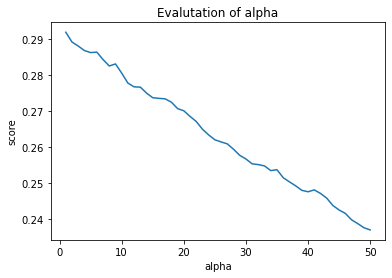

In [32]:
#Find optimal alpha
scores =pd.DataFrame(find_optimal_alpha(X_train_Cat_ordinal,y_train.flatten()))
#Plot evolution of alpha
lplot = sns.lineplot(data=scores,x='alpha',y='score')
lplot.set_title('Evalutation of alpha')
optimal_alpha_ordinal = int(scores[scores['score']==scores['score'].max()]['alpha'].values)

With one hot encoder:

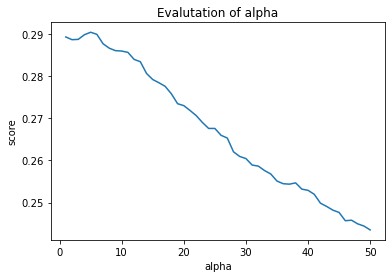

In [33]:
#Find optimal alpha
scores =pd.DataFrame(find_optimal_alpha(X_train_Cat_ohe,y_train.flatten()))
#Plot evolution of alpha
lplot = sns.lineplot(data=scores,x='alpha',y='score')
lplot.set_title('Evalutation of alpha')
optimal_alpha_ohe = int(scores[scores['score']==scores['score'].max()]['alpha'].values)

#### 2.1.2 Model comparison

In [34]:
#This function computes and plots a confusion matrix
def plot_confusion_matrix(y_pred,y_test,model_name):
    plt.figure(figsize=(5,5))
    cm = confusion_matrix(y_pred,y_test)
    hmap = sns.heatmap(cm,cbar=False,annot=True,cmap="Blues",fmt='.0f')
    hmap.set_title('Confusion Matrix {}'.format(model_name))
    hmap.set_xlabel('predicted label')
    hmap.set_ylabel('true label')
    plt.show()

In [35]:
#This function performs kfold cv and evaluates the performance of the model
def evaluate_model(model,X,y,model_name,binary=False,cm=False,print_results=False):
    #Definir Kfolds
    k_folds = KFold(n_splits=5, random_state=78, shuffle=True)
    preds = np.array([])
    trues = np.array([])
    #Loop sobre train_set e test_set
    for train_index, test_index in k_folds.split(X):
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #Fit model
        model.fit(x_train,y_train)
        y_preds = model.predict(x_test)
        
        if preds.size == 0 or trues.size == 0:
            preds = y_preds
            trues = y_test
        else:
            np.concatenate((preds,y_preds))
            np.concatenate((trues,y_test))
    #Calcular métricas
    
    
    if binary:
        report_scores = {'model':model_name,'acc':accuracy_score(trues,preds),'MCC':matthews_corrcoef(trues,preds)}
        if print_results:
            print("These are the training set statistics {}:".format(model_name))
            print("The Precision is: %7.4f" % precision_score(trues, preds))
            print("The Recall is: %7.4f" % recall_score(trues, preds))
            print("The F1 score is: %7.4f" % f1_score(trues, preds))
            print("The Matthews correlation coefficient is: %7.4f" % report_scores['MCC'])
    else:
        if print_results:
            print("These are the training set statistics {}:".format(model_name))
            report_scores = {'model':model_name,'acc':accuracy_score(trues,preds),'MCC':matthews_corrcoef(trues,preds)}
            print("The Accuracy Score is: %7.4f" % report_scores['acc'])
            print("The Matthews correlation coefficient is: %7.4f" % report_scores['MCC'])
    
    if cm:
        plot_confusion_matrix(preds,trues,model_name)
    return report_scores

These are the training set statistics Categorical NB ordinal:
The Accuracy Score is:  0.4090
The Matthews correlation coefficient is:  0.2949


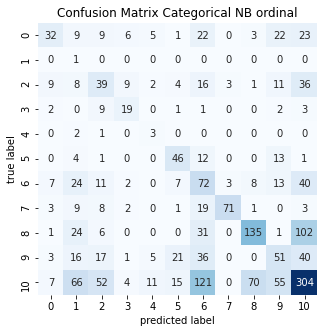

In [36]:
scores_CatNB_ordinal = evaluate_model(CategoricalNB(alpha=optimal_alpha_ordinal),
                                      X_train_Cat_ordinal,
                                      y_train.flatten(),
                                      'Categorical NB ordinal',
                                      cm=True,
                                     print_results=True)

These are the training set statistics Categorical NB ohe:
The Accuracy Score is:  0.3979
The Matthews correlation coefficient is:  0.2888


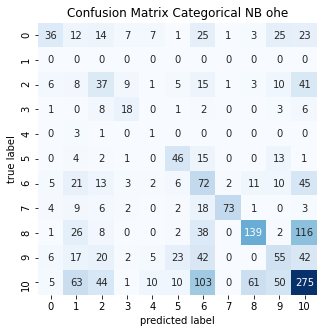

In [37]:
scores_CatNB_ohe = evaluate_model(CategoricalNB(alpha=optimal_alpha_ohe),
                                  X_train_Cat_ohe,
                                  y_train.flatten(),
                                  'Categorical NB ohe',
                                  cm=True,
                                  print_results=True)

These are the training set statistics Gaussian NB with Categorical Transform:
The Accuracy Score is:  0.2614
The Matthews correlation coefficient is:  0.2173


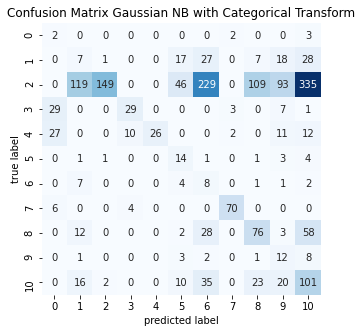

In [38]:
scores_GNB_Cat = evaluate_model(GaussianNB(),X_train_Cat_GNB,
                                y_train.flatten(),
                                'Gaussian NB with Categorical Transform',
                                cm=True,
                               print_results=True)

These are the training set statistics Gaussian NB:
The Accuracy Score is:  0.4275
The Matthews correlation coefficient is:  0.3249


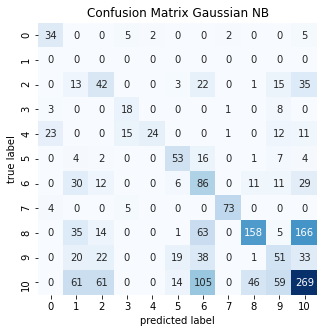

In [39]:
scores_GNB_no_Cat = evaluate_model(GaussianNB(),X_train_no_Cat_GNB,
                                   y_train.flatten(),
                                   'Gaussian NB',
                                   cm=True,
                                   print_results=True)

#### Feature Selection
After selecting the best algorithm to classify our data, we proceeded to select the features that best explain the classification of our dataset. For that, we used the "SequentialFeatureSelector" with forward selection, from SKlearn. This method adds features to form a feature subset in a greedy fashion. We iterated over a for loop in order to add a feature to the model in each iteration and obtain the MCC score for each model (the mean MCC obtained from a 3-fold cross validation). With that information we were able to plot the number of features and the MCC score of each model, and better decide the number of features to use in our model.

In [40]:
# Print dataset
#Xpd_train_Categ_NB_ordinal
Xpd_train_Gauss_NB_no_cat 

danceability    energy  loudness  speechiness  acousticness  \
0         1.510811 -0.789074 -1.113639     3.929398     -0.319085   
1         0.037602  0.962036  0.681585    -0.393633     -0.750581   
2         0.876848  0.187427  0.028411    -0.083284     -0.749911   
3        -0.240134  1.233973  0.284432    -0.151765     -0.750893   
4         0.194584  0.887871  0.676384    -0.599075     -0.632937   
...            ...       ...       ...          ...           ...   
9445     -0.336738 -0.096870 -1.346493    -0.580134      1.110933   
9446     -0.234096 -0.953884 -1.368951    -0.389262      1.032704   
9447      0.943263  0.566491  0.848956     0.578211      1.326843   
9448      0.333452  0.014377  0.368118    -0.562649     -0.746838   
9449     -0.904285 -0.039187  0.261029    -0.511653     -0.750834   

      instrumentalness  liveness   valence     tempo  duration_in min/ms  
0            -0.548501 -0.561727 -0.291500  0.938118            1.304074  
1            -0.559175 -0.726177  1.546957  0.842838           -0.068340  
2             0.987923 -0.549268  1.259698 -1.085563            0.514348  
3            -0.043189  0.528380  0.418440 -0.716477            0.355228  
4            -0.231566 -0.200434  0.307640 -0.886534           -1.827909  
...                ...       ...       ...       ...                 ...  
9445         -0.588484  0.895902  1.936809  0.843926           -0.430435  
9446         -0.568396  0.671651 -0.644418 -0.473548           -0.404375  
9447         -0.584854  1.182444  0.315848 -1.293875           -0.643603  
9448          1.268835 -0.331247  0.081937  0.133162           -0.115710  
9449         -0.543874  0.216921  0.172218 -1.069411           -0.029447  

[9450 rows x 10 columns]

In [42]:
# Define Model with Optimal Alpha
gnb=GaussianNB()


# Define Scorer 
mcc = make_scorer(matthews_corrcoef)

In [43]:
# NOTE: This piece of code takes some time to run. If <run_feature_selection> is False, it will load the precomputed
# values.
run_feature_selection = True

experiment_version = "v6"
save_experiment = False

max_features = len(Xpd_train_Gauss_NB_no_cat.columns)


if run_feature_selection:
    
    history = []
    
    for i in range(1, max_features):
        
        n_features = i
        
        # Select top n features with SequentialFeatureSelector (default: 'forward')
        # Note that sfs does not show the best score, only the most relevant features
        # https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector.get_feature_names_out
        # Therefore, a "cross_validate" with "selected_features" is performed to compute the mean score for the best i features.
        
        cv = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
        
        sfs = SequentialFeatureSelector(gnb, n_features_to_select=n_features, n_jobs=-1, scoring=mcc, cv = cv)
        
        sfs.fit(Xpd_train_Gauss_NB_no_cat,y_train.flatten())
        
        # Get top n feature names
        
        names_list = Xpd_train_Gauss_NB_no_cat.columns.tolist()
        names_array = np.array(names_list)
        selected_features = names_array[sfs.get_support()]
        selected_features = list(selected_features)
        
        # Get the MCC score for #i best features (based on the average of a 3 fold cross-validation)
        
        cv_results = cross_validate(gnb, Xpd_train_Gauss_NB_no_cat[selected_features], y_train.flatten(), cv=cv, scoring=mcc)
        print(f'Number of features {i}, MCC: {cv_results["test_score"].mean()}')
        
        # Create output dictionary and append it to the history list
        run_output = {'n_features':n_features,
                        'features':selected_features,
                        'mcc':cv_results['test_score'].mean()}
        
        history.append(run_output)
        
    
    # Create the results DataFrame
    df_scores = pd.DataFrame(history)
    
    if save_experiment:
        df_scores.to_csv(f'feature_selection_dataframe_{experiment_version}.csv', index=False)
else:
    df_scores = pd.read_csv(f'feature_selection_dataframe_{experiment_version}.csv')

Number of features 1, MCC: 0.1346817451812891
Number of features 2, MCC: 0.20266126124672312
Number of features 3, MCC: 0.23646522059396088
Number of features 4, MCC: 0.2667888277896091
Number of features 5, MCC: 0.28854656531639056
Number of features 6, MCC: 0.30457453422084163
Number of features 7, MCC: 0.3108620248350884
Number of features 8, MCC: 0.3127299742278903
Number of features 9, MCC: 0.3111039179573159


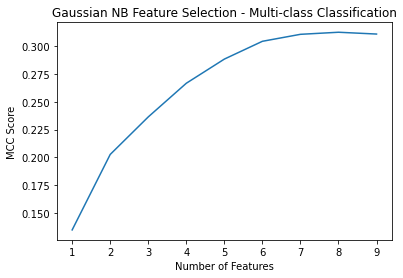

In [44]:
#plt.title('Categorical NB Feature Selection - Multi-class Classification')
plt.title('Gaussian NB Feature Selection - Multi-class Classification')
plt.xlabel('Number of Features')
plt.ylabel('MCC Score')
plt.plot(df_scores.n_features, df_scores.mcc)


The previous line plot represents the relation between number of features and the MCC score obtained when testing each model. Here we discuss that a good number of features to include in our model is 8. The MCC obtained with a Categorical Naïve Bayes with alpha=1 and with the best 8 features was ~0.31.

#### Test with validation set


In [45]:
# Validation features: Xpd_IVS; validation target: y_IVS

# Use the pre-trained estimators to transform the Validation Set using the same criteria to preprocess the training set

Xpd_IVS_transformed = Xpd_IVS.copy()

Xpd_IVS_transformed = Xpd_IVS.drop(columns=categorical, axis=1)
Xpd_IVS_transformed, Xpd_IVS_transformed_mmscaler_fit, Xpd_IVS_transformed_Gauss_no_cat_NB_sscaler_fit = minmax_ss_scaler(Xpd_IVS_transformed, list(numerical), minmax=False, sscaler=True)


In [47]:
#This function returns the features that maximized the mcc score
def find_optimal_features(df_scores):
    optimal_features = df_scores.loc[df_scores['mcc'] == df_scores['mcc'].max()]['features'].values
    optimal_features= list(np.array(list(optimal_features)).flatten())
    return optimal_features

In [48]:
# 1. Train a model with the selected features
optimal_features = find_optimal_features(df_scores)
model = GaussianNB()
model.fit(Xpd_train_Gauss_NB_no_cat[optimal_features], y_train.flatten())

GaussianNB()

In [49]:
# 2. Get the MCC score for the validation dataset
y_preds = model.predict(Xpd_IVS_transformed[optimal_features])
y_trues = y_IVS
print(matthews_corrcoef(y_trues,y_preds))

0.23514002942556536


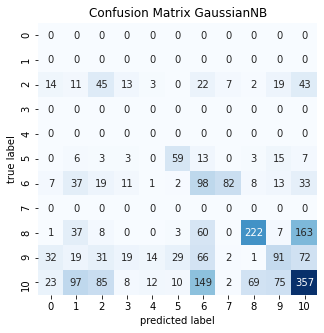

In [50]:
plot_confusion_matrix(y_preds,y_trues,'GaussianNB')

### Binary Classifier

In [51]:
group_n = 9
y_train_binary = np.array([int(y_train[i]==group_n) for i in range(len(y_train))])

#### 2.2.1 Categorical NB find best alpha

Ordinal:

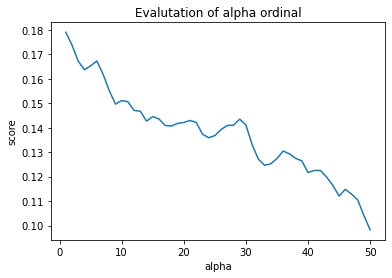

In [52]:
#Find optimal alpha
scores =pd.DataFrame(find_optimal_alpha(X_train_Cat_ordinal,y_train_binary))
#Plot evolution of alpha
lplot = sns.lineplot(data=scores,x='alpha',y='score')
lplot.set_title('Evalutation of alpha ordinal')
optimal_alpha_binary_ordinal = int(scores[scores['score']==scores['score'].max()]['alpha'].values)

OHE:

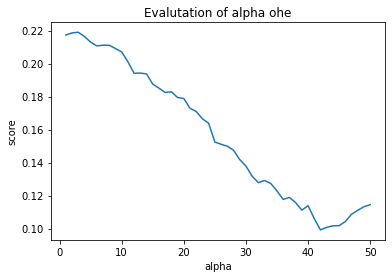

In [53]:
#Find optimal alpha
scores =pd.DataFrame(find_optimal_alpha(X_train_Cat_ohe,y_train_binary))
#Plot evolution of alpha
lplot = sns.lineplot(data=scores,x='alpha',y='score')
lplot.set_title('Evalutation of alpha ohe')
optimal_alpha_binary_ohe = int(scores[scores['score']==scores['score'].max()]['alpha'].values)

These are the training set statistics Categorical NB ordinal:
The Precision is:  0.2708
The Recall is:  0.1548
The F1 score is:  0.1970
The Matthews correlation coefficient is:  0.1479


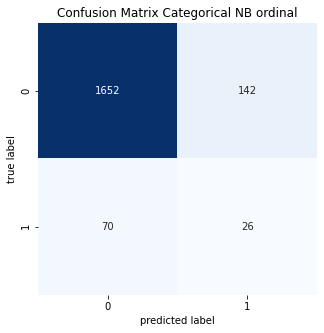

In [54]:
scores_CatNB_binary_ordinal = evaluate_model(CategoricalNB(\
    alpha=optimal_alpha_binary_ordinal),
    X_train_Cat_ordinal,
    y_train_binary,
    'Categorical NB ordinal',
    binary=True,cm=True,print_results=True)

These are the training set statistics Categorical NB ohe:
The Precision is:  0.2403
The Recall is:  0.3333
The F1 score is:  0.2793
The Matthews correlation coefficient is:  0.1996


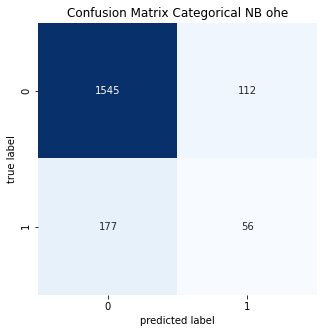

In [55]:
scores_CatNB_binary_ohe = evaluate_model(CategoricalNB(alpha=optimal_alpha_binary_ohe),
                                         X_train_Cat_ohe,
                                         y_train_binary,
                                         'Categorical NB ohe',
                                         binary=True,cm=True,print_results=True)

These are the training set statistics Gaussian NB with Categorical Transform:
The Precision is:  0.2483
The Recall is:  0.2202
The F1 score is:  0.2334
The Matthews correlation coefficient is:  0.1639


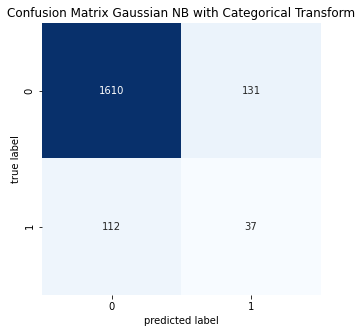

In [56]:
scores_GNB_Cat_binary = evaluate_model(GaussianNB(),X_train_Cat_GNB,y_train_binary,
                                       'Gaussian NB with Categorical Transform',
                                       binary=True,
                                       cm=True,
                                      print_results=True)

These are the training set statistics Gaussian NB:
The Precision is:  0.2646
The Recall is:  0.2976
The F1 score is:  0.2801
The Matthews correlation coefficient is:  0.2058


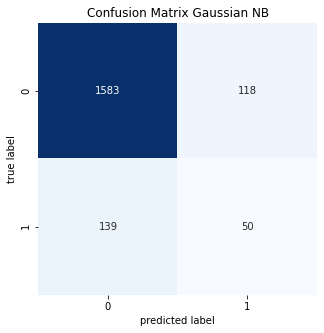

In [57]:
scores_GNB_no_Cat_binary = evaluate_model(GaussianNB(),X_train_no_Cat_GNB,y_train_binary,
                                          'Gaussian NB',binary=True,cm=True,print_results=True)

#### Feature Selection

In [58]:
#Xpd_train_Categ_NB_df = Xpd_train_Categ_NB.astype('int')
group_n = 9
y_IVS_binary = np.array([int(y_IVS[i]==group_n) for i in range(len(y_IVS))])


# Define Model 
#cnb=CategoricalNB(alpha=optimal_alpha_binary)
gnb_no_cat = GaussianNB()


In [59]:
Xpd_train_Gauss_NB_no_cat

danceability    energy  loudness  speechiness  acousticness  \
0         1.510811 -0.789074 -1.113639     3.929398     -0.319085   
1         0.037602  0.962036  0.681585    -0.393633     -0.750581   
2         0.876848  0.187427  0.028411    -0.083284     -0.749911   
3        -0.240134  1.233973  0.284432    -0.151765     -0.750893   
4         0.194584  0.887871  0.676384    -0.599075     -0.632937   
...            ...       ...       ...          ...           ...   
9445     -0.336738 -0.096870 -1.346493    -0.580134      1.110933   
9446     -0.234096 -0.953884 -1.368951    -0.389262      1.032704   
9447      0.943263  0.566491  0.848956     0.578211      1.326843   
9448      0.333452  0.014377  0.368118    -0.562649     -0.746838   
9449     -0.904285 -0.039187  0.261029    -0.511653     -0.750834   

      instrumentalness  liveness   valence     tempo  duration_in min/ms  
0            -0.548501 -0.561727 -0.291500  0.938118            1.304074  
1            -0.559175 -0.726177  1.546957  0.842838           -0.068340  
2             0.987923 -0.549268  1.259698 -1.085563            0.514348  
3            -0.043189  0.528380  0.418440 -0.716477            0.355228  
4            -0.231566 -0.200434  0.307640 -0.886534           -1.827909  
...                ...       ...       ...       ...                 ...  
9445         -0.588484  0.895902  1.936809  0.843926           -0.430435  
9446         -0.568396  0.671651 -0.644418 -0.473548           -0.404375  
9447         -0.584854  1.182444  0.315848 -1.293875           -0.643603  
9448          1.268835 -0.331247  0.081937  0.133162           -0.115710  
9449         -0.543874  0.216921  0.172218 -1.069411           -0.029447  

[9450 rows x 10 columns]

In [60]:
run_feature_selection = True

experiment_version = "v6"
save_experiment = False

#max_features = len(Xpd_train_Categ_NB_ordinal.columns)
max_features = len(Xpd_train_Gauss_NB_no_cat.columns)


if run_feature_selection:
    
    history = []
    
    for i in range(1, max_features):
        
        n_features = i
        
        # Select top n features with SequentialFeatureSelector (default: 'forward')
        # Note that sfs does not show the best score, only the most relevant features
        # https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html#sklearn.feature_selection.SequentialFeatureSelector.get_feature_names_out
        # Therefore, a "cross_validate" with "selected_features" is performed to compute the mean score for the best i features.
        
        cv = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)
       
        sfs = SequentialFeatureSelector(gnb, n_features_to_select=n_features, n_jobs=-1, scoring=mcc, cv = cv)
        
        sfs.fit(Xpd_train_Gauss_NB_no_cat,y_train_binary.flatten())
        
        # Get top n feature names
        
        names_list = Xpd_train_Gauss_NB_no_cat.columns.tolist()
        names_array = np.array(names_list)
        selected_features = names_array[sfs.get_support()]
        selected_features = list(selected_features)
        
        # Get the MCC score for #i best features (based on the average of a 3 fold cross-validation)
        
        
        cv_results = evaluate_model(gnb,Xpd_train_Gauss_NB_no_cat[selected_features].values,
                       y_train_binary.flatten(),
                       'Gaussian NB',
                       binary=True)
        
        print(cv_results)
        print(f'Number of features {i}, MCC: {cv_results["MCC"].mean()}')
        
        # Create output dictionary and append it to the history list
        run_output = {'n_features':n_features,
                        'features':selected_features,
                        'mcc':cv_results['MCC'].mean()}
        
        history.append(run_output)
        
    
    # Create the results DataFrame
    df_scores_binary = pd.DataFrame(history)
    
    if save_experiment:
        df_scores.to_csv(f'feature_selection_dataframe_{experiment_version}.csv', index=False)
else:
    df_scores = pd.read_csv(f'feature_selection_dataframe_{experiment_version}.csv')

{'model': 'Gaussian NB', 'acc': 0.9047619047619048, 'MCC': 0.01172483228961465}
Number of features 1, MCC: 0.01172483228961465
{'model': 'Gaussian NB', 'acc': 0.9037037037037037, 'MCC': 0.007657048647896111}
Number of features 2, MCC: 0.007657048647896111
{'model': 'Gaussian NB', 'acc': 0.9031746031746032, 'MCC': 0.020101754005337057}
Number of features 3, MCC: 0.020101754005337057
{'model': 'Gaussian NB', 'acc': 0.9005291005291005, 'MCC': 0.10751351838431625}
Number of features 4, MCC: 0.10751351838431625
{'model': 'Gaussian NB', 'acc': 0.8888888888888888, 'MCC': 0.12209471138394842}
Number of features 5, MCC: 0.12209471138394842
{'model': 'Gaussian NB', 'acc': 0.8798941798941798, 'MCC': 0.1486643195249255}
Number of features 6, MCC: 0.1486643195249255
{'model': 'Gaussian NB', 'acc': 0.8883597883597883, 'MCC': 0.1908351795239567}
Number of features 7, MCC: 0.1908351795239567
{'model': 'Gaussian NB', 'acc': 0.8756613756613757, 'MCC': 0.22613617288691307}
Number of features 8, MCC: 0.22

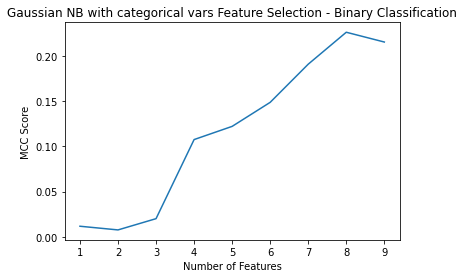

In [61]:
#plt.title('Categorical NB Feature Selection - Binary Classification')
plt.title('Gaussian NB with categorical vars Feature Selection - Binary Classification') 
plt.xlabel('Number of Features')
plt.ylabel('MCC Score')
plt.plot(df_scores_binary.n_features, df_scores_binary.mcc)

In [62]:
df_scores_binary

n_features                                           features       mcc
0           1                                         [liveness]  0.011725
1           2                       [instrumentalness, liveness]  0.007657
2           3             [loudness, instrumentalness, liveness]  0.020102
3           4  [danceability, loudness, instrumentalness, liv...  0.107514
4           5  [danceability, loudness, instrumentalness, liv...  0.122095
5           6  [danceability, loudness, instrumentalness, liv...  0.148664
6           7  [danceability, loudness, speechiness, instrume...  0.190835
7           8  [danceability, loudness, speechiness, instrume...  0.226136
8           9  [danceability, loudness, speechiness, acoustic...  0.215319

In [64]:
# 1. Train a model with the selected features
#model = CategoricalNB(alpha=optimal_alpha_binary)
#model.fit(Xpd_train_Categ_NB_ordinal[selected_features], y_train_binary.flatten())
optimal_features_binary = find_optimal_features(df_scores_binary)
model = GaussianNB()
model.fit(Xpd_train_Gauss_NB_no_cat[optimal_features_binary], y_train_binary.flatten())

GaussianNB()

In [65]:
# 2. transform validation set
Xpd_IVS_transformed_binary = Xpd_IVS.copy()
Xpd_IVS_transformed_binary, est_gauss_popularity = bin_numerical(Xpd_IVS_transformed_binary, popularity, 10, 'uniform')
Xpd_IVS_transformed_binary, Xpd_IVS_transformed_binaryfit, encode_features_binary_gaus = ohencode(Xpd_IVS_transformed_binary, categorical, boolean=False)
Xpd_IVS_transformed_binary, Xpd_IVS_transformed_binarymmscaler_fit, Xpd_IVS_transformed_binarysscaler_fit = minmax_ss_scaler(Xpd_IVS_transformed_binary, list(numerical), minmax=False, sscaler=True)

In [66]:
# 3. Get the MCC score for the validation dataset
y_preds = model.predict(Xpd_IVS_transformed_binary[optimal_features_binary])
y_trues = y_IVS_binary
print(matthews_corrcoef(y_trues,y_preds))

0.2011152020561737


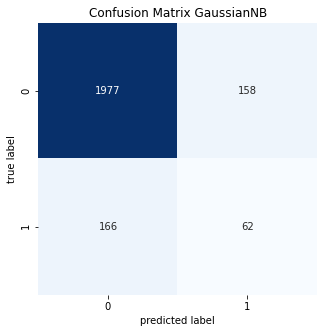

In [67]:
plot_confusion_matrix(y_preds,y_trues,'GaussianNB')